In [5]:
import jupyter_black

import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

jupyter_black.load()


if "/usr/src" not in sys.path:
    sys.path.append("/usr/src")

In [32]:
import torch
import torch.nn as nn
import torchvision.transforms as tfs

In [33]:
from PIL import Image


def image_to_tensor(img: Image.Image) -> torch.Tensor:
    tensor = torch.tensor(np.array(img) / 255)
    return tensor[None, None, :, :]


def tensor_to_image(tensor: torch.Tensor):
    image = tensor.squeeze()
    return Image.fromarray(image.numpy())

In [70]:
def alpha_t(beta_t: float):
    return 1 - beta_t


def alpha_t_cumprod(alpha_t_arr: torch.Tensor):
    res = 1
    for alpha_s in alpha_t_arr:
        res *= alpha_s
    return res


def sample_x_t(x_0, t: int, alphas_cumprod):
    eps = torch.randn_like(x_0)
    alpha_t_cumprod = alphas_cumprod[t]
    return torch.sqrt(alpha_t_cumprod) * x_0 + torch.sqrt(1 - alpha_t_cumprod) * eps

In [76]:
T = 10
betas = torch.linspace(0.0001, 0.02, T)
alphas = 1 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)

noised_images = []

with Image.open("../data/source_images/valid_img_0.png") as image:
    x_0 = tfs.ToTensor()(image)
    image.save("Step_0.png")
    for t in range(1, T):
        x_t = sample_x_t(x_0, t, alphas_cumprod)
        image_x_t = tfs.ToPILImage()(x_t)
        image_x_t.save(f"Step_{t}.png")
        # noised_images.append(tfs.ToPILImage()(x_t))

torch.Size([10])

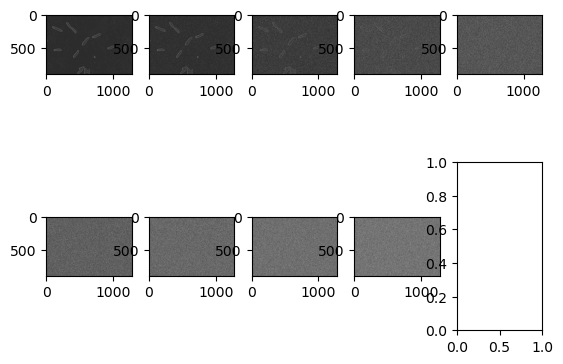

In [74]:
fig, axes = plt.subplots(2, 5)

for ax, img in zip(axes.flat, noised_images):
    ax.imshow(img, cmap="gray", vmin=0, vmax=255)